# ***Итоговый проект***

### **Анализ госзакупок в сфере культуры: сопоставление регионов с разным уровнем социально-экономического развития**

**Цель проекта**: Проанализировать различия в государственных закупках в сфере культуры между регионами России с разным уровнем социально-экономического развития. Исследование направлено на выявление возможных диспропорций в финансировании и организации культурных мероприятий, обусловленных экономическим благополучием региона.

Для анализа будут использованы данные о государственных закупках, размещенные на [портале Госзатраты](https://new.clearspending.ru/contracts?page=1), за период с 1 ноября по 31 декабря 2024 года. Выбор временного интервала обусловлен несколькими ключевыми факторами:

- Расширение временного охвата: Анализ данных в период с 1 ноября по 31 декабря позволяет учесть не только пиковую культурную активность в преддверии новогодних праздников, но и предшествующий месяц, который также является важным для планирования и финансирования культурных мероприятий. Ноябрь — это время подготовительных работ, организационных мероприятий и анонсов, что позволяет получить более полную картину культурных трат в регионах.

- Повышенная культурная активность населения: Декабрь — это время новогодних праздников и школьных каникул, когда значительно возрастает посещаемость кинотеатров, театров, концертов и других культурных мероприятий. Содержащееся в данных за ноябрь и декабрь, это время позволяет следить за изменениями в потреблении культурных благ и их доступности для населения.

- Специфика финансирования: В конце года выделенные бюджетные средства традиционно осваиваются и учреждения культуры могут делать стратегические закупки именно в этот период. Расширенный анализ даст возможность выявить особенности распределения финансирования и их зависимость от социально-экономического положения регионов. 

Сравнение сфокусируется на двух группах регионов, выбранных на основе рейтинга социально-экономического развития, опубликованного на сайте [сайте "РИА Новости"](https://ria.ru/20241223/itogi-1989954610.html).

Первая группа - регионы, которые попадают в топ-10 этого рейтинга (т.е. имеют самые высокие показатели).



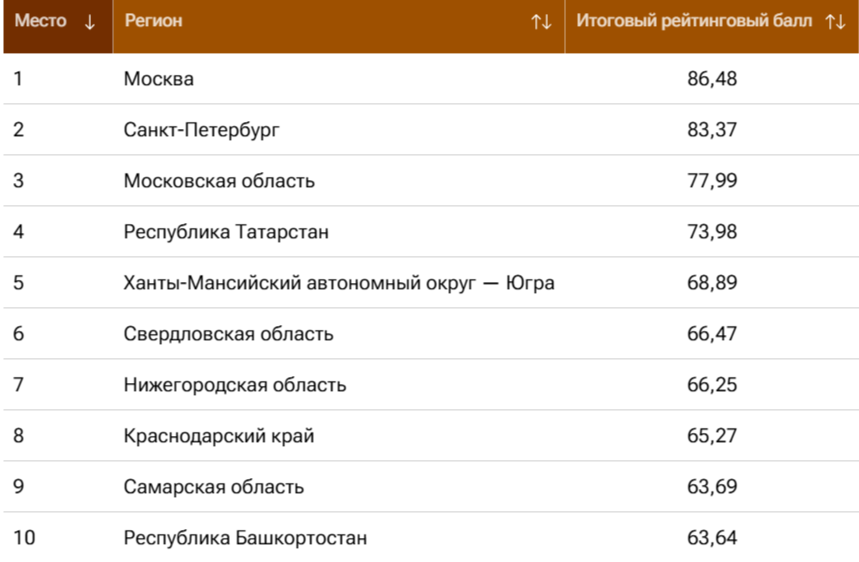

Вторая группа - 10 регионов с самыми плохими показателями

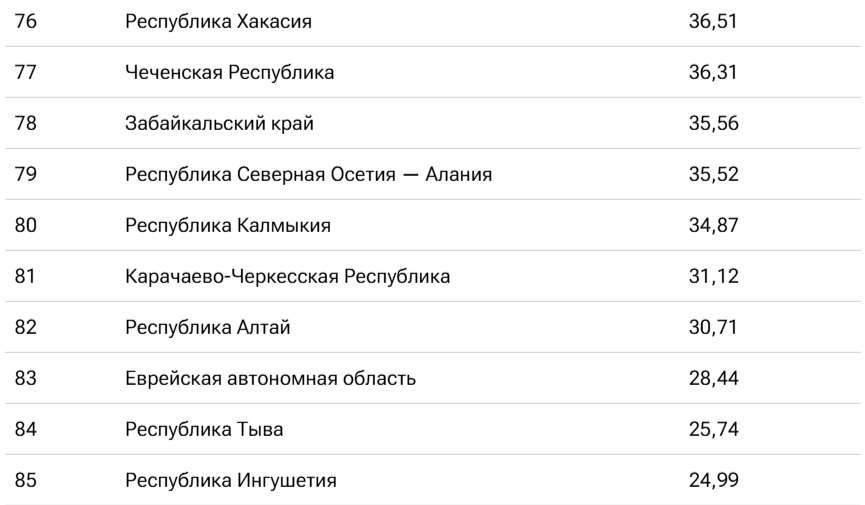

Перед тем, как приступить к сбору данных, мною были вручную отобраны коды продукции в подотрасли "Культура" для фильтрации результатов 

**Коды продукции:**

90.03.11.190 - Услуги, предоставляемые прочими авторами, за исключением артистов-исполнителей

90.02.1 - Услуги по поддержке исполнительских искусств

90.02.12.000 - Услуги по организации показа спектаклей, концертов и иных зрелищных программ (произведений исполнительского искусства), включая мероприятия по продвижению исполнительских искусств

90.04.10.110 - Услуги концертных залов, театров, оперных зданий, мюзик-холлов, включая услуги билетных касс

90.01.10.000 - Услуги в области исполнительских искусств

90.01.1 - Услуги в области исполнительских искусств

90.02.11.000 - Услуги по созданию спектаклей, концертов и иных зрелищных программ (произведений исполнительского искусства)

90.03.13.000 - Подлинники произведений живописцев, графиков и скульпторов

91.02.20.000 - Коллекции музейные

90.03.12.000 - Подлинники произведений писателей, композиторов и прочих художников, за исключением артистов, живописцев, графиков и скульпторов

91.01.12.000 - Услуги архивов

90.03.1 - Творчество художественное

Ниже представлен код, с помощью которого собираются необходимые данные:

In [133]:
!pip install flatten_json 
import pandas as pd #импорт необходимых библиотек
import json
import requests
from flatten_json import flatten
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
region_codes = ['77', '78', '50', '16', '86', '66', '52', '23', '63', '02', '19', '20', '75', '15', '08', '09', '04', '79', '17', '06']  # коды интересующих регионов
list_of_all_dfs = []
product_codes = ['90.03.11.190', '90.02.12.000', '90.04.10.110', '90.01.10.000', '90.02.11.000', '90.03.13.000', '91.02.20.000', '90.03.12.000', '91.01.12.000', '90.01.1', '90.03.1', '90.02.1'] #коды продукции

for region_code in region_codes:
    print(f'Сбор данных для региона с кодом {region_code}')
    df_region = pd.DataFrame()

    for product_code in product_codes:
        print(f'Сбор данных для продукта с кодом {product_code}')

        for page in range(1, 26): 
            key = "EI1HuAz2or1Bu2CHHN5lOBvi1BhrNEUm"
            url = f"https://newapi.clearspending.ru/csinternalapi/v1/filtered-contracts/?apikey={key}&format=json&sort=-sign_date&product_codes={product_code}&fz=44&region_code={region_code}&sign_date_gte=2024-11-01&sign_date_lte=2024-12-31&page={page}"

            response = requests.get(url)
            print(f'Запрашиваем страница {page} для региона {region_code} и продукта {product_code}, статус = {response.status_code}')

            if response.status_code == 429:
                print("Слишком много запросов. Ожидаем перед повторением...")
                time.sleep(60)  # Ожидание 60 секунд
                continue  # Возврат к началу цикла для повторения запроса

            if response.status_code != 200:
                print("Ошибка с запросом")
                break  # Выйти из цикла при ошибке запроса

            data = response.json()

            if 'data' in data and len(data['data']) > 0:
                for record in data['data']:
                    ser = pd.Series(flatten(record))
                    df_region = pd.concat([df_region, ser.to_frame().T], ignore_index=True)
            else:
                print(f'Нет данных на странице {page} для региона {region_code} и продукта {product_code}')
                break

            time.sleep(10)  # Задержка в 10 секунду между запросами, чтобы избежать ограничения

    list_of_all_dfs.append(df_region)

final_df = pd.concat(list_of_all_dfs, ignore_index=True)

print(f'Всего записей: {len(final_df)}')
print('Done')

Сбор данных для региона с кодом 77
Сбор данных для продукта с кодом 90.03.11.190
Запрашиваем страница 1 для региона 77 и продукта 90.03.11.190, статус = 200
Запрашиваем страница 2 для региона 77 и продукта 90.03.11.190, статус = 200
Запрашиваем страница 3 для региона 77 и продукта 90.03.11.190, статус = 200
Запрашиваем страница 4 для региона 77 и продукта 90.03.11.190, статус = 200
Запрашиваем страница 5 для региона 77 и продукта 90.03.11.190, статус = 200
Запрашиваем страница 6 для региона 77 и продукта 90.03.11.190, статус = 200
Запрашиваем страница 7 для региона 77 и продукта 90.03.11.190, статус = 200
Запрашиваем страница 8 для региона 77 и продукта 90.03.11.190, статус = 200
Запрашиваем страница 9 для региона 77 и продукта 90.03.11.190, статус = 200
Запрашиваем страница 10 для региона 77 и продукта 90.03.11.190, статус = 200
Нет данных на странице 10 для региона 77 и продукта 90.03.11.190
Сбор данных для продукта с кодом 90.02.12.000
Запрашиваем страница 1 для региона 77 и продукт

В результате сбора данных получаем следующий датасет:

In [12]:
final_df

,amount,amount_rur,currency,current_stage,customer_inn,customer_kpp,customer_name,exec_start_date,exec_start_date_timestamp,fed_district_code,...,product_names_334,product_names_335,product_names_336,product_names_337,product_names_338,product_names_339,product_names_340,product_names_341,product_names_342,product_names_343
0,2950000.0,2950000.0,RUB,None,7710130279,771001001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ КУЛЬТУРЫ ...,2024-12-30,None,CFO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30000.0,30000.0,RUB,None,7730116466,773001001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ КУЛЬТУРЫ ...,2024-12-30,None,CFO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,106000.0,106000.0,RUB,None,7721032971,772101001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ КУЛЬТУРЫ ...,2024-12-28,None,CFO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29220.29,29220.29,RUB,None,7721032971,772101001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ КУЛЬТУРЫ ...,2024-12-28,None,CFO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5000.0,5000.0,RUB,None,7701127897,770101001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ КУЛЬТУРЫ ...,2024-12-27,None,CFO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,60000.0,60000.0,RUB,None,7812024600,150102001,ФИЛИАЛ ФЕДЕРАЛЬНОГО ГОСУДАРСТВЕННОГО БЮДЖЕТНОГ...,2024-11-11,None,SKFO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3107,648300.0,648300.0,RUB,None,7900001747,790101001,ОБЛАСТНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ...,2024-12-06,None,DFO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3108,614700.0,614700.0,RUB,None,7900001747,790101001,ОБЛАСТНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ...,2024-12-06,None,DFO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3109,325400.0,325400.0,RUB,None,7900001747,790101001,ОБЛАСТНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ...,2024-11-12,None,DFO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Отчистим полученный датасет от пустых значений (их слишком много, поэтому этот шаг необходим):

In [15]:
final_df_cleaned = final_df.dropna(axis=1)
final_df_cleaned

,amount,amount_rur,currency,customer_inn,customer_kpp,customer_name,exec_start_date,fed_district_code,fz,product_codes_0,product_names_0,purchase_code,region_code,regnum,sign_date,subject
0,2950000.0,2950000.0,RUB,7710130279,771001001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ КУЛЬТУРЫ ...,2024-12-30,CFO,44,90.03.11.190,Приобретение исключительной лицензии на исполь...,242771013027977100100101580010000244,77,2771013027924000155,2024-12-30,Приобретение Театром права использовать создан...
1,30000.0,30000.0,RUB,7730116466,773001001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ КУЛЬТУРЫ ...,2024-12-30,CFO,44,90.03.11.190,Приобретение исключительной лицензии на исполь...,242773011646677300100102110010000244,77,2773011646624000207,2024-12-30,Оказание услуг по предоставлению права использ...
2,106000.0,106000.0,RUB,7721032971,772101001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ КУЛЬТУРЫ ...,2024-12-28,CFO,44,90.03.11.190,Создание композитором музыкального произведения,242772103297177210100100850010000244,77,2772103297124000075,2024-12-28,Неисключительное авторское право на использова...
3,29220.29,29220.29,RUB,7721032971,772101001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ КУЛЬТУРЫ ...,2024-12-28,CFO,44,90.03.11.190,"Аранжировка авторских произведений, усл. ед",242772103297177210100100860010000244,77,2772103297124000076,2024-12-28,Оказание услуг музыкального супервайзера музык...
4,5000.0,5000.0,RUB,7701127897,770101001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ КУЛЬТУРЫ ...,2024-12-27,CFO,44,90.03.11.190,Приобретение исключительных прав на использова...,242770112789777010100101670010000244,77,2770112789724000164,2024-12-27,"Исполнитель, являясь обладателем исключительны..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,60000.0,60000.0,RUB,7812024600,150102001,ФИЛИАЛ ФЕДЕРАЛЬНОГО ГОСУДАРСТВЕННОГО БЮДЖЕТНОГ...,2024-11-11,SKFO,44,90.01.10.000,Оказание услуг в качестве приглашенного дириже...,241781202460015010200101280859001244,15,1781202460024000704,2024-11-05,Оказание услуг в качестве приглашенного дириже...
3107,648300.0,648300.0,RUB,7900001747,790101001,ОБЛАСТНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ...,2024-12-06,DFO,44,90.02.12.000,"Организация и проведение балета ""Лебединое озе...",242790000174779010100100050079002244,79,2790000174724000009,2024-12-06,"Услуги по организации показа спектаклей, конце..."
3108,614700.0,614700.0,RUB,7900001747,790101001,ОБЛАСТНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ...,2024-12-06,DFO,44,90.02.12.000,"Организация и проведение балета ""Щелкунчик"" в ...",242790000174779010100100050069002244,79,2790000174724000010,2024-12-06,"Услуги по организации показа спектаклей, конце..."
3109,325400.0,325400.0,RUB,7900001747,790101001,ОБЛАСТНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ...,2024-11-12,DFO,44,90.02.12.000,"Организация и проведение спектакля ""Дублеры ил...",242790000174779010100100050059002244,79,2790000174724000008,2024-11-12,"Услуги по организации показа спектаклей, конце..."


Представленный датасет насчитывает всего *3111* строк, но это обусловлено спецификой темы и выбранным временным промежутком

Посмотрим сколько записей удалось собрать по регионам:

In [90]:
final_df_cleaned['region_code'].value_counts()

region_code
77    1672
78     758
16     423
02      88
50      53
66      28
63      23
15      17
86      15
52      15
23      11
20       4
79       3
17       1
Name: count, dtype: int64

Можно заметить, что в шести регионах, среди которых Республика Хакасия (19), Забайкальский край (75), Республика Калмыкия (08), Карачаево-Черкесская Республика (09), Республика Алтай (04) и Республика Ингушетия (06), не зафиксировано никаких контрактов в сфере культуры. Эти регионы относятся ко второй группе, характеризующейся низкими показателями по рейтингу социально-экономического развития от РИА Новости. 

Это уже свидетельствует о недостаточном финансировании культурных инициатив, низкой активности местных властей в организации культурных событий или о наличии иных факторов, препятствующих развитию культуры. 

Узнаем, какая средняя стоимость контрактов в каждом регионе:

In [82]:
grouped_amount = final_df_cleaned.groupby('region_code')['amount'].mean().reset_index()
grouped_amount.sort_values(by = 'amount', ascending = False) #фильтрация значений от большего к меньшего по признаку amount

,region_code,amount
11,78,975179.419380
6,50,821821.735283
8,63,757845.303913
5,23,699540.909091
10,77,659461.663624
12,79,529466.666667
7,52,371483.268667
4,20,347782.500000
13,86,302677.668000
2,16,301398.909054


Визуализируем результаты для наибольшей наглядности:

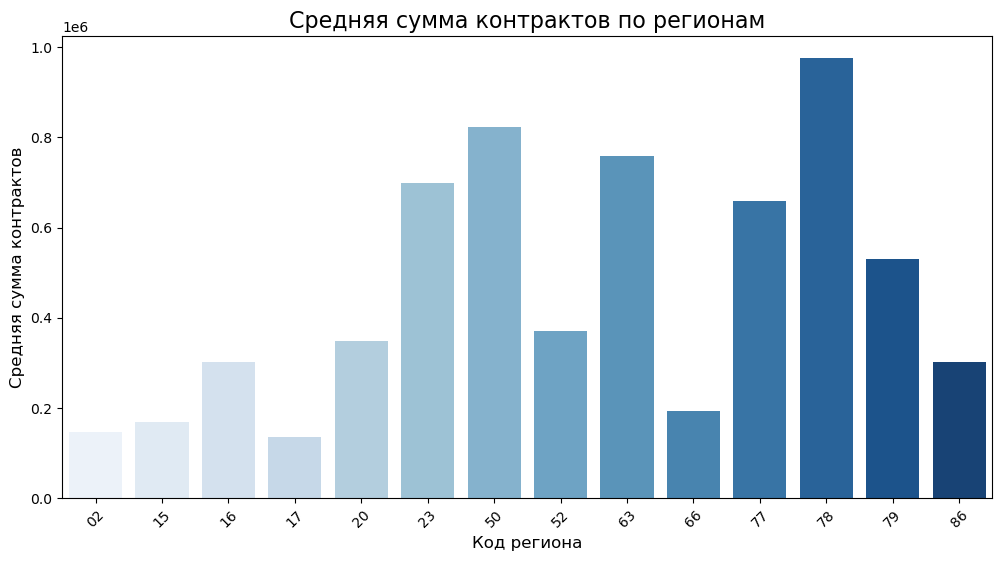

In [80]:
plt.figure(figsize=(12, 6))
sns.barplot(x='region_code', y='amount', data=grouped_amount, palette='Blues')
plt.title('Средняя сумма контрактов по регионам', fontsize=16)
plt.xlabel('Код региона', fontsize=12)
plt.ylabel('Средняя сумма контрактов', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Результаты анализа графика и сводной таблицы показывают, что наибольшая средняя стоимость контрактов зафиксирована в Санкт-Петербурге (78) [ 975179 рублей ]. Московская (50) и Самарская (63) области следуют за ним с показателями [ 821822 рубля ] и [ 757845 рублей ], соответственно.

In [130]:
grouped_amount_sum = final_df_cleaned.groupby('region_code')['amount'].sum().reset_index() #общая сумма контрактов 
grouped_amount_sum.sort_values(by = 'amount', ascending = False)

,region_code,amount
10,77,1.102620e+09
11,78,7.391860e+08
2,16,1.274917e+08
6,50,4.355655e+07
8,63,1.743044e+07
0,02,1.287840e+07
5,23,7.694950e+06
7,52,5.572249e+06
9,66,5.397354e+06
13,86,4.540165e+06


Несмотря на то, что Санкт-Петербург демонстрирует более высокую среднюю стоимость контракта, Москва лидирует по общей стоимости заключенных сделок. Тем не менее, эти два города имеют огромное финансирование в сфере культуры, что более наглядно видно на следующем графике:

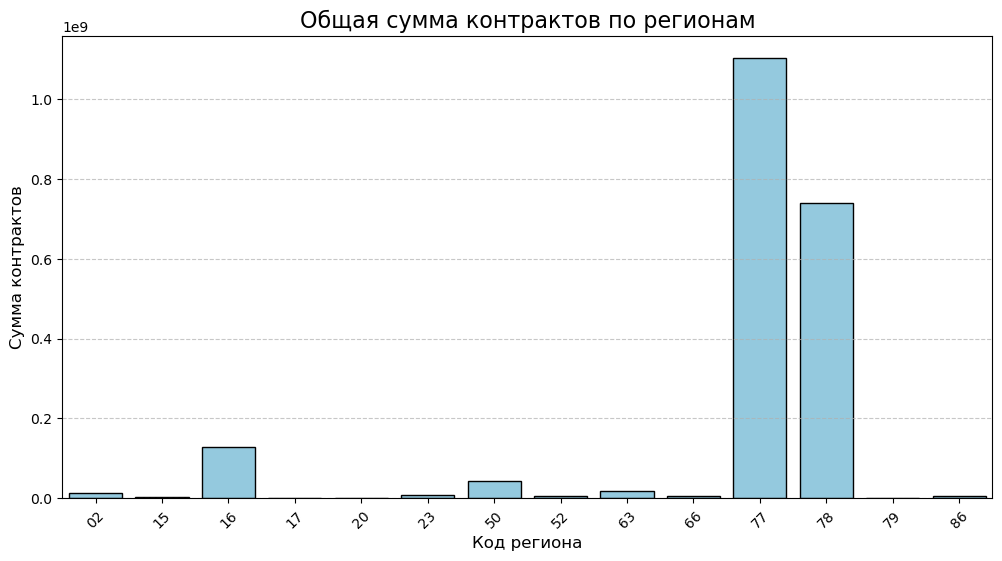

In [124]:
plt.figure(figsize=(12, 6))
sns.barplot(x='region_code', y='amount', data=grouped_amount_sum, color='skyblue', edgecolor='black')
plt.title('Общая сумма контрактов по регионам', fontsize=16)
plt.xlabel('Код региона', fontsize=12)
plt.ylabel('Сумма контрактов', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()

Прослеживается положительная корреляция между количеством контрактов и общей стоимостью для трех регионов, занимающих первые позиции по числу заключенных сделок. Однако, дальнейший анализ выявляет значительные отклонения от этой тенденции.

В частности, Республика Башкортостан, занимая четвертое место по количеству сделок, опускается на шестое место в рейтинге по общей стоимости контрактов. Примечательно, что Краснодарский край, заключив вдвое меньше контрактов, чем Свердловская область, опережает её и занимает седьмую позицию по общей стоимости сделок.

В низу рейтинга по сумме стоимости контрактов оказались: Республика Тыва (17), Чеченская Республика (20), Еврейская автономная область (79), Республика Северная Осетия - Алания (15), Ханты-Мансийский автономный округ — Югра (86).

В то время как большинство регионов с низким финансированием культуры закономерно занимают низкие позиции в рейтинге от РИА Новости (4 из 5), положение Ханты-Мансийского автономного округа, демонстрирующего высокие результаты в рейтинге РИА Новости, представляет собой аномалию. Это позволяет предположить, что региональные особенности финансирования культуры могут определяться не только общим уровнем социально-экономического развития, но и фактором, связанным с принадлежностью к определенному федеральному округу.

In [103]:
grouped_district = final_df_cleaned.groupby('region_code')['fed_district_code'].unique()
grouped_district

region_code
02     [PFO]
15    [SKFO]
16     [PFO]
17     [SFO]
20    [SKFO]
23    [YUFO]
50     [CFO]
52     [PFO]
63     [PFO]
66    [URFO]
77     [CFO]
78    [SZFO]
79     [DFO]
86    [URFO]
Name: fed_district_code, dtype: object

- Республика Тыва (17) - (SFO) Сибирский федеральный округ

- Чеченская Республика (20) - (SKFO) Северо-Кавказский федеральный округ

- Еврейская автономная область (79) - (DFO)  Дальневосточный федеральный округ

- Республика Северная Осетия - Алания (15) - (SKFO) Северо-Кавказский федеральный округ

- Ханты-Мансийский автономный округ — Югра (86) - (URFO) Уральский федеральный округ

Принимая во внимание географическое расположение указанных регионов, можно отметить их значительную удаленность от Центрального федерального округа. В связи с этим возникает гипотеза о возможной обратной зависимости между удаленностью региона от центра и уровнем финансирования сферы культуры. Хотя на данном этапе преждевременно делать однозначные выводы, полученные данные позволяют обозначить данную взаимосвязь как перспективную область для дальнейших исследований.

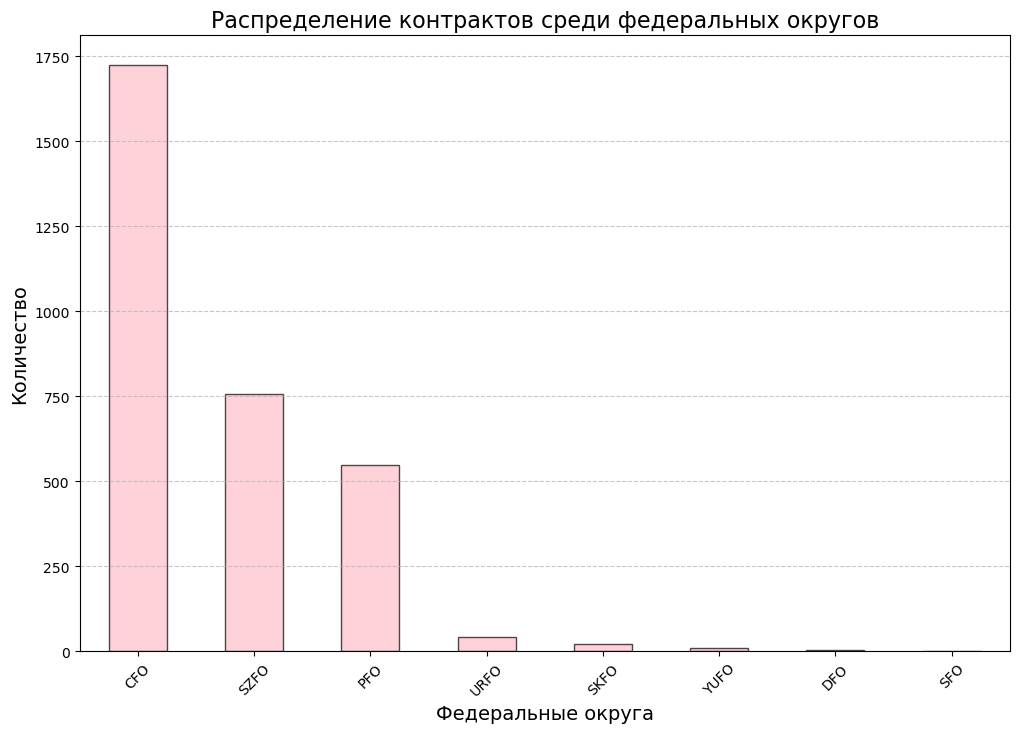

In [129]:
fed_district_counts = final_df_cleaned['fed_district_code'].value_counts()
plt.figure(figsize=(12, 8))
fed_district_counts.plot(kind='bar', color='pink', alpha=0.7, edgecolor='black')
plt.title('Распределение контрактов среди федеральных округов', fontsize=16)
plt.xlabel('Федеральные округа', fontsize=14) 
plt.ylabel('Количество', fontsize=14) 
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

Естественно, при рассмотрении вопросов финансирования культуры необходимо учитывать масштаб региона, в частности, численность населения. Центральный федеральный округ с населением около 40 миллионов человек закономерно демонстрирует более высокие показатели финансирования, что обусловлено как необходимостью удовлетворения культурных потребностей большего числа жителей, так и большим совокупным бюджетным потенциалом составляющих его регионов. 

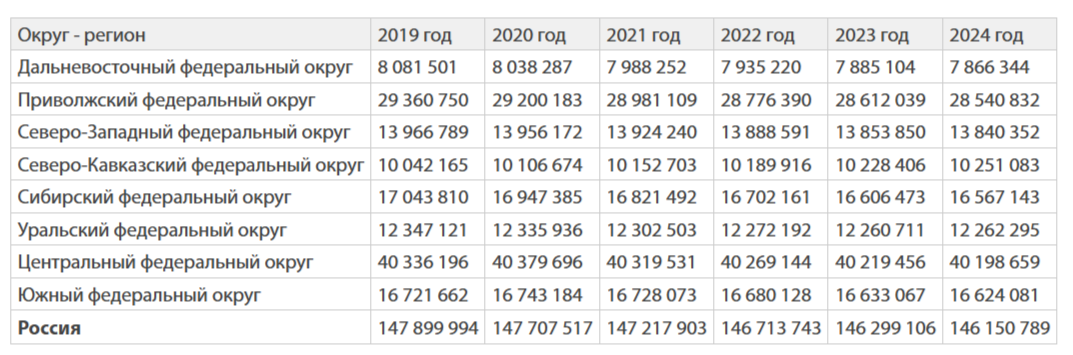

* по данным Федеральной службы государственной статистики

## Вывод

Анализ государственных закупок в сфере культуры подтверждает существенное влияние уровня социально-экономического развития региона на объемы финансирования культурной сферы. Выявлены выраженные диспропорции, проявляющиеся в недостаточном финансировании учреждений культуры и ограниченных возможностях для реализации инновационных проектов в регионах с более низким уровнем экономического развития. Это подчеркивает необходимость государственной поддержки для выравнивания возможностей в сфере культуры и обеспечения равного доступа граждан к культурным благам, независимо от места проживания.